<a href="https://colab.research.google.com/github/SwagataJ/machine-learning-concepts/blob/main/Swagata_Jana_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multi-label Genre Classification

Create a multi-label genre classification model using Tensorflow that automatically
assigns genre names looking at the summary of the movie.
1. Use pre-built embeddings for your data dictionary
2. Train the model using Transformer/Attention based architecture
3. Reach an overall “precision” score of 70%
4. Use TF serving to deploy the model as an API (on local)
5. Build a TF serving client to interact with the API. This client should also be able
to continuously accept data entered by the user and provide the genre for the
chat entered by the end-user.


Dataset - [CMU Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/)

Or download from - http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz


In [1]:
! wget http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz

--2023-05-16 07:13:11--  http://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48002242 (46M) [application/x-gzip]
Saving to: ‘MovieSummaries.tar.gz’

MovieSummaries.tar. 100%[===================>]  45.78M  3.08MB/s    in 26s     

2023-05-16 07:13:37 (1.78 MB/s) - ‘MovieSummaries.tar.gz’ saved [48002242/48002242]



In [2]:
! tar xvzf MovieSummaries.tar.gz

MovieSummaries/
MovieSummaries/tvtropes.clusters.txt
MovieSummaries/name.clusters.txt
MovieSummaries/plot_summaries.txt
MovieSummaries/README.txt
MovieSummaries/movie.metadata.tsv
MovieSummaries/character.metadata.tsv


In [3]:
import pandas as pd

import nltk 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
! pwd

/content


In [5]:
movie_metadata = pd.read_csv("/content/MovieSummaries/movie.metadata.tsv", sep='\t')
movie_metadata.head()

,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [6]:
#Naming all the Headers
movie_metadata_names=[ "Wikipedia movie ID",
                      "Freebase movie ID",
                      "Movie name",
                      "Movie release date",
                      "Movie box office revenue",
                      "Movie runtime",
                      "Movie languages",
                      "Movie countries",
                      "Movie genres"
                      ]

In [7]:
movie_metadata = pd.read_csv("/content/MovieSummaries/movie.metadata.tsv", sep='\t', names=movie_metadata_names)
movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
movie_metadata["Movie genres"] = movie_metadata["Movie genres"].map(lambda genres: list(eval(genres).values()))

In [9]:
movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}",[Drama]


In [10]:
plot_summaries=pd.read_csv('/content/MovieSummaries/plot_summaries.txt',sep='\t',names=["Wikipedia movie ID","Plot Summary"])
plot_summaries.head()

,Wikipedia movie ID,Plot Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


Since the plot summaries and movie metadata are not already sorted according to their movie ids, we have to merge the dataframe based on movie ids

In [11]:
dataset = pd.merge(movie_metadata,plot_summaries,on="Wikipedia movie ID")
dataset.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Plot Summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}",[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."


In [12]:
#Dropping all the unwanted columns 
dataset=dataset.drop(
    columns=[
        "Freebase movie ID",
        "Movie name",
        "Movie release date",
        "Movie box office revenue",
        "Movie runtime",
        "Movie languages",
        "Movie countries"
        ])

In [13]:
dataset

,Wikipedia movie ID,Movie genres,Plot Summary
0,975900,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,"[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."
...,...,...,...
42199,23851782,"[Crime Fiction, Thriller, Comedy, Supernatural]",{{plot}} The film opens with a Great Western e...
42200,35228177,[Drama],Two former National Oceanic Atmospheric Admini...
42201,34980460,"[Biographical film, Drama, Documentary]",{{No plot}} This film follows 12 years in the ...
42202,913762,"[Science Fiction, Japanese Movies, Adventure, ...","The story takes place in the year 2092,The Sup..."


In [14]:
dataset["Plot Summary"]=dataset["Plot Summary"].str.replace("{{No plot}}","")
dataset["Plot Summary"]=dataset["Plot Summary"].str.replace("{{plot}}","")
dataset["Plot Summary"]=dataset["Plot Summary"].str.lower()

<ipython-input-14-c58ce0386d9a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["Plot Summary"]=dataset["Plot Summary"].str.replace("{{No plot}}","")
<ipython-input-14-c58ce0386d9a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset["Plot Summary"]=dataset["Plot Summary"].str.replace("{{plot}}","")


In [15]:
dataset

,Wikipedia movie ID,Movie genres,Plot Summary
0,975900,"[Thriller, Science Fiction, Horror, Adventure,...","set in the second half of the 22nd century, th..."
1,9363483,"[Thriller, Erotic thriller, Psychological thri...",a series of murders of rich young women throug...
2,261236,[Drama],"eva, an upper class housewife, becomes frustra..."
3,18998739,"[Family Film, Fantasy, Adventure, World cinema]","every hundred years, the evil morgana returns..."
4,6631279,"[Romantic comedy, Ensemble Film, Comedy-drama,...","adam, a san francisco-based artist who works a..."
...,...,...,...
42199,23851782,"[Crime Fiction, Thriller, Comedy, Supernatural]",the film opens with a great western express s...
42200,35228177,[Drama],two former national oceanic atmospheric admini...
42201,34980460,"[Biographical film, Drama, Documentary]",this film follows 12 years in the lives of 3 ...
42202,913762,"[Science Fiction, Japanese Movies, Adventure, ...","the story takes place in the year 2092,the sup..."


In [16]:
dataset.isnull().sum()

Wikipedia movie ID    0
Movie genres          0
Plot Summary          0
dtype: int64

genres ka word cloud bhi banana hai

In [17]:
genres = dataset['Movie genres']

In [18]:
print(genres)

0        [Thriller, Science Fiction, Horror, Adventure,...
1        [Thriller, Erotic thriller, Psychological thri...
2                                                  [Drama]
3          [Family Film, Fantasy, Adventure, World cinema]
4        [Romantic comedy, Ensemble Film, Comedy-drama,...
                               ...                        
42199      [Crime Fiction, Thriller, Comedy, Supernatural]
42200                                              [Drama]
42201              [Biographical film, Drama, Documentary]
42202    [Science Fiction, Japanese Movies, Adventure, ...
42203                    [Thriller, Horror, Slasher, Teen]
Name: Movie genres, Length: 42204, dtype: object


In [19]:
all_genres = sum(genres,[])
len(set(all_genres))

363

In [20]:
print(all_genres)

['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western', 'Thriller', 'Erotic thriller', 'Psychological thriller', 'Drama', 'Family Film', 'Fantasy', 'Adventure', 'World cinema', 'Romantic comedy', 'Ensemble Film', 'Comedy-drama', 'Drama', 'Comedy', 'Romantic drama', 'Romance Film', 'Costume drama', 'War film', 'Epic', 'Period piece', 'Drama', 'Film adaptation', 'Comedy', 'Science Fiction', 'Adventure', 'Animation', 'Short Film', 'Fantasy', 'Family Film', 'Action', "Children's/Family", 'Musical', 'Fantasy', 'Comedy', 'Drama', 'Family Film', "Children's Fantasy", 'Romantic comedy', 'Romance Film', 'Comedy', 'Indie', 'Romance Film', 'Crime Fiction', 'Drama', 'Coming of age', 'Family Film', 'Comedy', 'Action', 'World cinema', 'Musical', 'Drama', 'Romantic drama', 'Romance Film', 'Bollywood', 'Drama', 'Romantic comedy', 'Romance Film', 'Comedy', 'World cinema', 'Indie', 'Drama', 'Comedy', 'Fan film', 'Short Film', 'Indie', 'Black comedy', 'Comedy', '

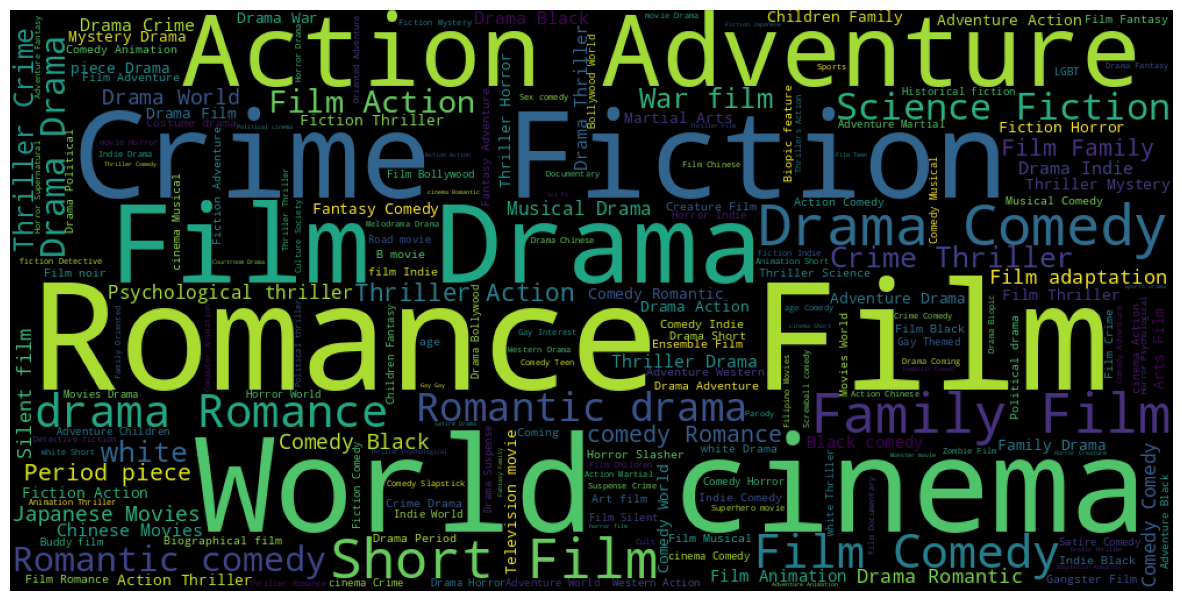

In [21]:
from wordcloud import WordCloud


unique_string = (" ").join(all_genres)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("genres_cloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [22]:
all_genres = nltk.FreqDist(all_genres)
genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 'Count': list (all_genres.values())})
genres_df.head()

,Genre,Count
0,Thriller,6530
1,Science Fiction,2339
2,Horror,4082
3,Adventure,3248
4,Supernatural,571


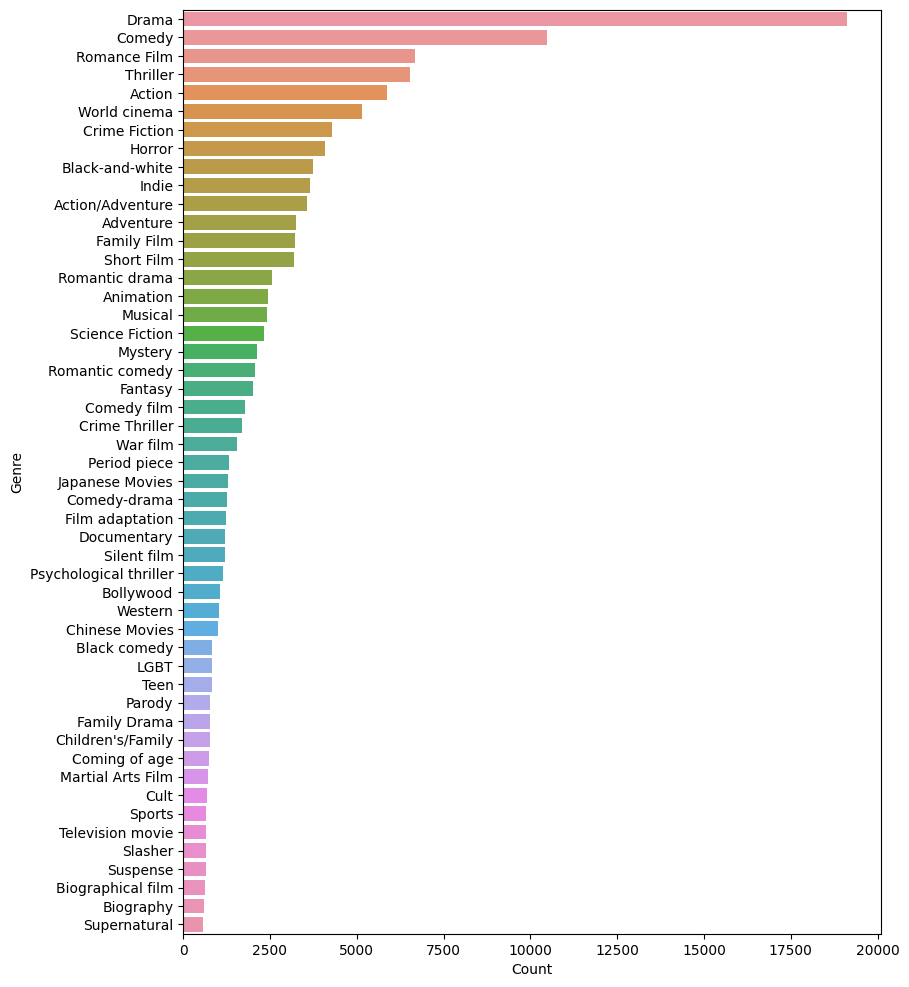

In [23]:
g = genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(9,12)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Genre') 
plt.show()

In [24]:
movie_genres = dataset['Movie genres']
movie_genres

0        [Thriller, Science Fiction, Horror, Adventure,...
1        [Thriller, Erotic thriller, Psychological thri...
2                                                  [Drama]
3          [Family Film, Fantasy, Adventure, World cinema]
4        [Romantic comedy, Ensemble Film, Comedy-drama,...
                               ...                        
42199      [Crime Fiction, Thriller, Comedy, Supernatural]
42200                                              [Drama]
42201              [Biographical film, Drama, Documentary]
42202    [Science Fiction, Japanese Movies, Adventure, ...
42203                    [Thriller, Horror, Slasher, Teen]
Name: Movie genres, Length: 42204, dtype: object

In [25]:
dataset = dataset.join(movie_genres.str.join('|').str.get_dummies())

In [26]:
dataset.head()

,Wikipedia movie ID,Movie genres,Plot Summary,Absurdism,Acid western,Action,Action Comedy,Action Thrillers,Action/Adventure,Addiction Drama,...,Werewolf fiction,Western,Whodunit,Women in prison films,Workplace Comedy,World History,World cinema,Wuxia,Z movie,Zombie Film
0,975900,"[Thriller, Science Fiction, Horror, Adventure,...","set in the second half of the 22nd century, th...",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9363483,"[Thriller, Erotic thriller, Psychological thri...",a series of murders of rich young women throug...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,261236,[Drama],"eva, an upper class housewife, becomes frustra...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18998739,"[Family Film, Fantasy, Adventure, World cinema]","every hundred years, the evil morgana returns...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6631279,"[Romantic comedy, Ensemble Film, Comedy-drama,...","adam, a san francisco-based artist who works a...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
print(dataset.columns)

Index(['Wikipedia movie ID', 'Movie genres', 'Plot Summary', 'Absurdism',
       'Acid western', 'Action', 'Action Comedy', 'Action Thrillers',
       'Action/Adventure', 'Addiction Drama',
       ...
       'Werewolf fiction', 'Western', 'Whodunit', 'Women in prison films',
       'Workplace Comedy', 'World History', 'World cinema', 'Wuxia', 'Z movie',
       'Zombie Film'],
      dtype='object', length=366)


In [28]:
dataset = dataset.drop(['Movie genres', 'Wikipedia movie ID'], axis=1)

In [29]:
dataset.head()

,Plot Summary,Absurdism,Acid western,Action,Action Comedy,Action Thrillers,Action/Adventure,Addiction Drama,Adult,Adventure,...,Werewolf fiction,Western,Whodunit,Women in prison films,Workplace Comedy,World History,World cinema,Wuxia,Z movie,Zombie Film
0,"set in the second half of the 22nd century, th...",0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,a series of murders of rich young women throug...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"eva, an upper class housewife, becomes frustra...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"every hundred years, the evil morgana returns...",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,"adam, a san francisco-based artist who works a...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
columns = dataset.columns

In [31]:
genre_names = columns[1:]
threshold = 20
for name in genre_names:
    if dataset[name].value_counts()[1]<=threshold:
        dataset=dataset.drop(name,axis=1)

In [32]:
dataset.head()

,Plot Summary,Absurdism,Action,Action Comedy,Action Thrillers,Action/Adventure,Addiction Drama,Adult,Adventure,Adventure Comedy,...,Tollywood,Tragedy,Tragicomedy,War film,Western,Whodunit,Workplace Comedy,World cinema,Wuxia,Zombie Film
0,"set in the second half of the 22nd century, th...",0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,a series of murders of rich young women throug...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"eva, an upper class housewife, becomes frustra...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"every hundred years, the evil morgana returns...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,"adam, a san francisco-based artist who works a...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
ck = dataset
ck

,Plot Summary,Absurdism,Action,Action Comedy,Action Thrillers,Action/Adventure,Addiction Drama,Adult,Adventure,Adventure Comedy,...,Tollywood,Tragedy,Tragicomedy,War film,Western,Whodunit,Workplace Comedy,World cinema,Wuxia,Zombie Film
0,"set in the second half of the 22nd century, th...",0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,a series of murders of rich young women throug...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"eva, an upper class housewife, becomes frustra...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"every hundred years, the evil morgana returns...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,"adam, a san francisco-based artist who works a...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42199,the film opens with a great western express s...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42200,two former national oceanic atmospheric admini...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42201,this film follows 12 years in the lives of 3 ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42202,"the story takes place in the year 2092,the sup...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
ck['label'] = dataset[dataset.columns[1:]].values.tolist()

In [35]:
ck

,Plot Summary,Absurdism,Action,Action Comedy,Action Thrillers,Action/Adventure,Addiction Drama,Adult,Adventure,Adventure Comedy,...,Tragedy,Tragicomedy,War film,Western,Whodunit,Workplace Comedy,World cinema,Wuxia,Zombie Film,label
0,"set in the second half of the 22nd century, th...",0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,a series of murders of rich young women throug...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"eva, an upper class housewife, becomes frustra...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"every hundred years, the evil morgana returns...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,"adam, a san francisco-based artist who works a...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42199,the film opens with a great western express s...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42200,two former national oceanic atmospheric admini...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42201,this film follows 12 years in the lives of 3 ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42202,"the story takes place in the year 2092,the sup...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [36]:
mk = ck[['Plot Summary', 'label']].copy()
mk

,Plot Summary,label
0,"set in the second half of the 22nd century, th...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,a series of murders of rich young women throug...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"eva, an upper class housewife, becomes frustra...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"every hundred years, the evil morgana returns...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,"adam, a san francisco-based artist who works a...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
42199,the film opens with a great western express s...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42200,two former national oceanic atmospheric admini...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42201,this film follows 12 years in the lives of 3 ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42202,"the story takes place in the year 2092,the sup...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [37]:
mk=mk.convert_dtypes()

In [38]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 42203
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Plot Summary  42204 non-null  string
 1   label         42204 non-null  object
dtypes: object(1), string(1)
memory usage: 2.0+ MB


In [39]:
train=mk.sample(frac=0.8)
test= mk.drop(train.index)

In [40]:
train

,Plot Summary,label
13527,three friends face mid-life crises. paul is a ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11534,leo tego is in a prison of the dominican repu...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22190,"the voice-over of an anonym guinean in exile, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
38428,"set in a working class community, it tells the...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
41341,{{quote}} the film opens with shakespeare's pr...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
36256,"in a city of the future, sexual intercourse is...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
19329,the story is set at a local movie theater. car...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15028,young samantha parkington lives with her grand...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18575,"the protagonist, alfredo lópez, is an exaspera...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [41]:
test

,Plot Summary,label
2,"eva, an upper class housewife, becomes frustra...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14,"professor kurian fernandez , a convict escapes...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
15,"mary, an orphan lives in an orphanage run by n...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22,the film is a collision of three separate stor...,"[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
23,"in the fictional farming village of tlachtlán,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
42188,"charlie daines , is a morphine-addicted detect...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42190,a story about a young man who inherits a broke...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42196,after accidentally causing the death of his pa...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
42200,two former national oceanic atmospheric admini...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [42]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.3 MB/s eta 0:00:00


In [43]:
import tensorflow as tf 
import tensorflow_text as text
import tensorflow_hub as hub

import os

In [44]:
train_list=train["Plot Summary"].to_list()
test_list=test["Plot Summary"].to_list()

ytrain_list=train["label"].to_list()
ytest_list=test["label"].to_list()

In [45]:
train_ds=tf.data.Dataset.from_tensor_slices((train_list,ytrain_list))
test_ds =tf.data.Dataset.from_tensor_slices((test_list,ytest_list))

In [46]:
train_ds = train_ds.shuffle(10000).batch(16, drop_remainder=True)
test_ds = test_ds.shuffle(10000).batch(16, drop_remainder=True)

In [47]:
preprocessor2 = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder2 = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2",
    trainable=False)

In [48]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = preprocessor2(text_input)
outputs = encoder2(preprocessed_text)

l = tf.keras.layers.Dropout(0.6, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(213, activation='softmax', name="output")(l)

model2 = tf.keras.Model(inputs=[text_input], outputs = [l])

In [49]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

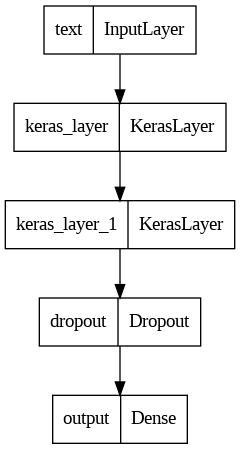

In [50]:
from keras.utils import plot_model
plot_model(model2)

In [51]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]


# Compiling the model with adam optimizers and binary crossentropy as loss
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [52]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint_filepath = 'best_model.h5'
checkpoint = ModelCheckpoint(
    checkpoint_filepath, 
    monitor='val_precision', 
    save_best_only=True, 
    mode='max', 
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_precision",
    patience=5,
    verbose=1,
    mode="auto",
    restore_best_weights=True,
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_precision",
    factor=0.01,
    patience=5,
    verbose=1,
    mode="auto",
    min_delta=0.0001
)

In [53]:
model2.fit(train_ds,validation_data=test_ds, epochs=10, callbacks=[checkpoint, early_stop, reduce_lr])

Epoch 1/10
2110/2110 [==============================] - ETA: 0s - loss: 0.0723 - accuracy: 0.9834 - precision: 0.5982 - recall: 0.0023
Epoch 1: val_precision improved from -inf to 0.00000, saving model to best_model.h5
2110/2110 [==============================] - 111s 49ms/step - loss: 0.0723 - accuracy: 0.9834 - precision: 0.5982 - recall: 0.0023 - val_loss: 0.0597 - val_accuracy: 0.9833 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/10
2110/2110 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9834 - precision: 0.6568 - recall: 0.0033
Epoch 2: val_precision improved from 0.00000 to 0.83333, saving model to best_model.h5
2110/2110 [==============================] - 97s 46ms/step - loss: 0.0616 - accuracy: 0.9834 - precision: 0.6568 - recall: 0.0033 - val_loss: 0.0588 - val_accuracy: 0.9833 - val_precision: 0.8333 - val_recall: 1.6672e-04 - lr: 0.0010
Epoch 3/10
2110/2110 [==============================] - ETA: 0s - loss: 0.0610 - accur